In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from ecglib.data import load_ptb_xl
from ecglib.data import EcgDataset
import pandas as pd

In [2]:
import time

In [22]:
import warnings
import neurokit2 as nk
from neurokit2 import NeuroKitWarning  
from pathlib import Path

warnings.filterwarnings("ignore") 

In [23]:
from paths import data_dir

In [ ]:
from cycles_signal_process import (
    prepare_wave_data,
    group_pqrst_points,
    calculate_amplitudes,
    calculate_intervals,
    calculate_amplitude_differences,
    calculate_all_wave_areas,
    calculate_area_ratios,

    calc_average_signal,
    calculate_statistics,
)
from features_extraction import (
    calc_signal_morphology_features,
)

from features_analysis import (
    plot_features_vs_age,
    calculate_age_correlations
)

In [6]:
"""from features_process import (
    extract_lead_features,
    process_patient_file
)"""

'from features_process import (\n    extract_lead_features,\n    process_patient_file\n)'

In [7]:
data_dir, data_dir.exists()

(Path('C:/Users/lenovo/Desktop/sci/data/ecg'), True)

In [8]:
path_to_zip=data_dir
frequency = 500

channel_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
fs = 500

# Download PTB-XL data

In [9]:
#ptb_xl_info = load_ptb_xl(download=True, path_to_zip=path_to_zip, path_to_unzip=path_to_zip)

# Loading PTB-XL data

In [10]:
ptb_xl_info = pd.read_csv(path_to_zip / "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2" / "ptbxl_database.csv")

In [11]:
ptb_xl_info["fpath"] = [
    str(path_to_zip / "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2" / filename)
    for filename in ptb_xl_info["filename_hr"]
]
ptb_xl_info['frequency'] = frequency

In [12]:
ptb_xl_info

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,fpath,frequency
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00001_hr,500
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00002_hr,500
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00003_hr,500
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00004_hr,500
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00005_hr,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21796,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,False,True,False,False,False,False,False,True,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21833_hr,500
21797,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21834_hr,500
21798,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21835_hr,500
21799,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21836_hr,500


In [13]:
targets = [
    [0.0] if 'AFIB' in eval(ptb_xl_info.iloc[i]['scp_codes']).keys() else [1.0] 
           for i in range(ptb_xl_info.shape[0])
]

In [14]:
ecg_data = EcgDataset(ecg_data=ptb_xl_info, target=targets, frequency=frequency, leads=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [15]:
ecg_data.ecg_data


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,fpath,frequency
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00001_hr,500
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00002_hr,500
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00003_hr,500
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00004_hr,500
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00005_hr,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21796,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,False,True,False,False,False,False,False,True,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21833_hr,500
21797,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21834_hr,500
21798,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21835_hr,500
21799,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21836_hr,500


In [16]:
ecg_data[50][1][0][0].shape

torch.Size([12, 5000])

# Getting features

In [17]:
import pandas as pd
import neurokit2 as nk
import numpy as np
from pathlib import Path
from tqdm import tqdm

processed_dir = Path('ptb_xl_npz')
fs = 500

In [18]:

"""
def plot_ecg_cycle_with_features(cycle, signal, fs, cycle_num=0):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # 1. Автоматическое определение границ цикла --------------------------------------
    available_points = []
    for point in ['ECG_P_Onsets', 'ECG_Q_Peaks', 'ECG_R_Peaks', 'ECG_S_Peaks', 'ECG_T_Offsets']:
        if point in cycle and len(cycle[point]) > 0:
            available_points.append(int(cycle[point][0]))
    
    if not available_points:
        print(f"Цикл {cycle_num}: нет точек для отрисовки")
        return fig
    
    # Границы цикла (с запасом 10% по краям)
    start = max(0, min(available_points) - int(0.1*fs))
    end = min(len(signal), max(available_points) + int(0.1*fs))
    
    # 2. Отрисовка сигнала ----------------------------------------------------------
    time = np.arange(start, end) / fs
    ax.plot(time, signal[start:end], 'b-', linewidth=1.5, label='ЭКГ сигнал')
    
    # 3. Разметка точек (только существующие) ---------------------------------------
    point_style = {
        'ECG_P_Onsets': ('<', 'green', 'P начало'),
        'ECG_P_Peaks': ('o', 'lime', 'P пик'),
        'ECG_P_Offsets': ('>', 'darkgreen', 'P конец'),
        'ECG_Q_Peaks': ('x', 'red', 'Q'),
        'ECG_R_Peaks': ('o', 'black', 'R'),
        'ECG_S_Peaks': ('x', 'blue', 'S'),
        'ECG_T_Onsets': ('<', 'purple', 'T начало'),
        'ECG_T_Peaks': ('o', 'magenta', 'T пик'),
        'ECG_T_Offsets': ('>', 'darkviolet', 'T конец')
    }
    
    for point, (marker, color, label) in point_style.items():
        if point in cycle and len(cycle[point]) > 0:
            x = cycle[point][0] / fs
            y = signal[int(cycle[point][0])]
            ax.plot(x, y, marker=marker, color=color, markersize=10, label=label)
    
    # 4. Отрисовка интервалов (только для существующих пар) -------------------------
    def draw_interval_if_exists(start_point, end_point, y_pos, label):
        if (start_point in cycle and len(cycle[start_point]) > 0 and 
            end_point in cycle and len(cycle[end_point]) > 0):
            x1 = cycle[start_point][0] / fs
            x2 = cycle[end_point][0] / fs
            ax.add_patch(Rectangle((x1, y_pos), x2-x1, 0.1, alpha=0.3, color='gray'))
            ax.text((x1+x2)/2, y_pos+0.15, f'{label}\n{(x2-x1)*1000:.1f} мс', 
                    ha='center', va='bottom', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
    
    y_min = np.min(signal[start:end])
    draw_interval_if_exists('ECG_P_Onsets', 'ECG_P_Offsets', y_min-0.3, 'P')
    draw_interval_if_exists('ECG_Q_Peaks', 'ECG_S_Peaks', y_min-0.5, 'QRS')
    draw_interval_if_exists('ECG_Q_Peaks', 'ECG_T_Offsets', y_min-0.7, 'QT')
    
    # 5. Настройка графика ----------------------------------------------------------
    ax.set_xlabel('Время (с)', fontsize=12)
    ax.set_ylabel('Амплитуда (мВ)', fontsize=12)
    ax.set_title(f'Цикл {cycle_num}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Убираем дубликаты в легенде
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right')
    
    plt.tight_layout()
    return fig

def plot_averaged_signal(avg_signal, before_r, after_r, fs):
    if avg_signal is None:
        print("Невозможно построить график: недостаточно данных")
        return
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # 1. Временная ось (в мс относительно R-пика)
    time = (np.arange(len(avg_signal)) - before_r) / fs * 1000  # мс
    
    # 2. Отрисовка сигнала
    ax.plot(time, avg_signal, 'b-', linewidth=2, label='Усредненный ЭКГ')
    
    # 3. Разметка ключевых элементов
    ax.axvline(x=0, color='r', linestyle='--', label='R-пик (0 мс)')
    ax.axvline(x=-before_r, color='gray', linestyle=':', label=f'Начало окна (-{before_r/fs*1000:.0f} мс)')
    ax.axvline(x=after_r, color='gray', linestyle=':', label=f'Конец окна (+{after_r/fs*1000:.0f} мс)')
    
    # 4. Настройка графика
    ax.set_xlabel('Время относительно R-пика (мс)', fontsize=12)
    ax.set_ylabel('Амплитуда (мВ)', fontsize=12)
    ax.set_title(f'Усредненный PQRST комплекс (окно ±{before_r/fs*1000:.0f}/{after_r/fs*1000:.0f} мс)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

def plot_averaged_ecg(signal, cycles, fs):
    # 1. Подготовка данных для усреднения
    r_peaks = [int(cycle['ECG_R_Peaks'][0]) for cycle in cycles if 'ECG_R_Peaks' in cycle]
    if len(r_peaks) < 2:
        print("Недостаточно циклов для усреднения")
        return
    
    before_r = int(0.2 * fs)  # 200 мс до R
    after_r = int(0.5 * fs)   # 500 мс после R
    segments = []
    
    for r in r_peaks:
        start = max(0, r - before_r)
        end = min(len(signal), r + after_r)
        segment = signal[start:end]
        
        # Выравнивание по длине (если циклы у границ сигнала)
        if len(segment) < (before_r + after_r):
            pad_width = (before_r + after_r) - len(segment)
            segment = np.pad(segment, (0, pad_width), mode='constant')
        
        segments.append(segment)
    
    # 3. Усреднение и построение
    avg_signal = np.mean(segments, axis=0)
    time = (np.arange(len(avg_signal)) / fs) - 0.2  # Время относительно R-пика
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(time, avg_signal, 'b-', linewidth=2, label='Усредненный сигнал')
    
    # 4. Разметка характерных точек (медианные положения)
    point_labels = {
        'ECG_P_Peaks': ('P', 'green'),
        'ECG_Q_Peaks': ('Q', 'red'),
        'ECG_S_Peaks': ('S', 'blue'),
        'ECG_T_Peaks': ('T', 'purple')
    }
    
    for point_key, (label, color) in point_labels.items():
        points = []
        for cycle in cycles:
            if point_key in cycle and len(cycle[point_key]) > 0:
                points.append(cycle[point_key][0])
        
        if len(points) > 0:
            median_pos = np.median(points) - r_peaks[0]  # Относительно первого R-пика
            median_time = median_pos / fs
            y_val = np.interp(median_pos, np.arange(len(avg_signal)), avg_signal)
            ax.plot(median_time, y_val, 'o', color=color, markersize=8, label=label)
    
    # 5. Настройка графика
    ax.axvline(x=0, color='black', linestyle='--', label='R-пик')
    ax.set_xlabel('Время относительно R-пика (с)')
    ax.set_ylabel('Амплитуда (мВ)')
    ax.set_title(f'Усредненный PQRST комплекс (n={len(cycles)} циклов)')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
"""

'\ndef plot_ecg_cycle_with_features(cycle, signal, fs, cycle_num=0):\n    fig, ax = plt.subplots(figsize=(15, 8))\n\n    # 1. Автоматическое определение границ цикла --------------------------------------\n    available_points = []\n    for point in [\'ECG_P_Onsets\', \'ECG_Q_Peaks\', \'ECG_R_Peaks\', \'ECG_S_Peaks\', \'ECG_T_Offsets\']:\n        if point in cycle and len(cycle[point]) > 0:\n            available_points.append(int(cycle[point][0]))\n\n    if not available_points:\n        print(f"Цикл {cycle_num}: нет точек для отрисовки")\n        return fig\n\n    # Границы цикла (с запасом 10% по краям)\n    start = max(0, min(available_points) - int(0.1*fs))\n    end = min(len(signal), max(available_points) + int(0.1*fs))\n\n    # 2. Отрисовка сигнала ----------------------------------------------------------\n    time = np.arange(start, end) / fs\n    ax.plot(time, signal[start:end], \'b-\', linewidth=1.5, label=\'ЭКГ сигнал\')\n\n    # 3. Разметка точек (только существующие) ----

In [19]:
import neurokit2 as nk
import numpy as np
import pandas as pd

def get_waves_peak(cleaned_signal, fs, method="dwt", waves_peak_info=None):
    if waves_peak_info is None:
        peaks, rpeaks = nk.ecg_peaks(cleaned_signal, sampling_rate=fs)
        _, waves_peak_info = nk.ecg_delineate(
            cleaned_signal, 
            rpeaks, 
            sampling_rate=fs, 
            method=method # dwt cwt peak - slow, prominence - fast
        )

        waves_peak_info['ECG_R_Peaks'] = rpeaks['ECG_R_Peaks']
    return waves_peak_info

def calc_signal_morphology_features(cleaned_signal, fs, waves_peak_info, avg_signal=False):
    features = pd.Series(dtype=float)
    waves_peak_info = prepare_wave_data(waves_peak_info)
    #print(waves_peak_info)
    grouped_cycles = group_pqrst_points(waves_peak_info)
    #print(len(grouped_cycles))
    grouped_cycles = calculate_amplitudes(grouped_cycles, cleaned_signal)
    
    grouped_cycles = calculate_intervals(grouped_cycles, fs)
    grouped_cycles = calculate_amplitude_differences(grouped_cycles)
    #print(grouped_cycles[0]['intervals'])
    #print(grouped_cycles[0]['amplitudes'])
    #print(grouped_cycles[0]['diff_amplitudes'])

    grouped_cycles = calculate_all_wave_areas(grouped_cycles, cleaned_signal, fs)
    grouped_cycles = calculate_area_ratios(grouped_cycles)
    stats = calculate_statistics(grouped_cycles)
    features = pd.Series(stats)
    
    return features



def calc_features(signal_cleaned, fs, method="dwt", waves_peak_info=None, avg_signal=False, show_plot=False):
    features_series = pd.Series(dtype=float)

    if avg_signal:
        avg_signal, before_r, after_r = calc_average_signal(signal_cleaned, waves_peak_info['ECG_R_Peaks'], fs)
        signal_cleaned = np.tile(avg_signal, num_repeats=10)

    if show_plot:
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=fs)
        nk.ecg_plot(signals, info)

    waves_peak_info = get_waves_peak(
        signal_cleaned, fs, method=method, waves_peak_info=waves_peak_info
    )
    nk_pqrst = calc_signal_morphology_features(signal_cleaned, fs, waves_peak_info=waves_peak_info)
    features_series = pd.concat([
        nk_pqrst,
    ], axis=0)
    features_series = features_series[~features_series.index.duplicated(keep='first')]
    #print('features_series', features_series)

    return features_series, waves_peak_info

def extract_scalar(value):
    if isinstance(value, (list, np.ndarray)):
        try:
            while isinstance(value, (list, np.ndarray)):
                value = value[0]
            return value
        except IndexError:
            return np.nan
    else:
        return value 
    
def get_ecg_signal_features(file_path, fs, method="dwt", waves_peak_info=None, avg_signal=False, show_plot=False):
    data = np.load(file_path, allow_pickle=True)
    signal = data['signal']
    
    features_series = pd.Series({
        'patient_id': data['patient_id'].item(),
        'target': data['target'].item() if 'target' in data else np.nan,
        'file_name': Path(file_path).name,
        'age': data['age'].item(),
        'sex': data['sex'].item(),
    })
    waves_peak = {}
    for i, channel_name in enumerate(channel_names):
        lead_signal = signal[i]
        #print(f"\nLead {channel_name} signal length: {len(lead_signal)} samples ({len(lead_signal)/fs:.2f} seconds)")
        signal_cleaned = nk.ecg_clean(lead_signal, sampling_rate=fs)

        waves_peak_channel = waves_peak_info if waves_peak_info is None else waves_peak_info.get(channel_name, None)
        waves_peak_channel = get_waves_peak(
            signal_cleaned, fs, method=method, waves_peak_info=waves_peak_channel
        )
        channel_features, waves_peak_channel = calc_features(
            signal_cleaned, fs, method=method, waves_peak_info=waves_peak_channel, avg_signal=avg_signal, show_plot=show_plot
        )
        channel_features.index = [f"{feature_name}_{channel_name}" for feature_name in channel_features.index]
        if not channel_features.empty:
            features_series = pd.concat([features_series, channel_features])

        waves_peak[channel_name] = waves_peak_channel
    return features_series, waves_peak

In [31]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

from matplotlib.patches import Rectangle, ConnectionPatch

def get_npz_files(input_dir):
    npz_files = list(input_dir.glob("*.npz"))
    print(f"Found {len(npz_files)} patient files")
    return npz_files

def save_features_batch(all_features_df, output_dir, npz_files, batch_size, idx=None):
    if idx is not None:
        if (idx + 1) % batch_size == 0 or (idx + 1) == len(npz_files):
            start_idx = (idx // batch_size) * batch_size
            end_idx = idx
            batch_filename = f"patient_features_{start_idx + 1}_to_{end_idx + 1}.parquet"
            all_features_df.to_parquet(output_dir / batch_filename, index=False)
            print(f"Saved batch {batch_filename}")
            return pd.DataFrame()
        return all_features_df
    else:
        if not all_features_df.empty:
            start_idx = (len(npz_files) // batch_size) * batch_size
            end_idx = len(npz_files) - 1
            batch_filename = f"patient_features_{start_idx + 1}_to_{end_idx + 1}.parquet"
            all_features_df.to_parquet(output_dir / batch_filename, index=False)
            print(f"Saved final batch {batch_filename}")
        return pd.DataFrame()

def prepare_output_paths(processed_dir, output_dir_features, output_dir_peaks, method, avg_signal):
    output_dir_features = processed_dir.parent / output_dir_features
    output_dir_peaks = processed_dir.parent / output_dir_peaks / f'{method}_avg' \
        if avg_signal else processed_dir.parent / output_dir_peaks / method
    
    output_dir_features.mkdir(parents=True, exist_ok=True)
    output_dir_peaks.mkdir(parents=True, exist_ok=True)
    
    return output_dir_features, output_dir_peaks

def get_ecg_signals_features(
    processed_dir, 
    batch_size=2000, 
    fs=500,
    npz_files=None,
    output_dir_features='ptb_xl_features_signal_morphplpgy', 
    output_dir_peaks='ptb_xl_peaks', 
    method="dwt", 
    avg_signal=False, show_plot=False, calc_waves_peak=True
):
    all_features_df = pd.DataFrame()

    if npz_files is None:
        npz_files = list(processed_dir.glob("*.npz"))
        print(f"Found {len(npz_files)} patient files")

    output_dir_features, output_dir_peaks = prepare_output_paths(
        processed_dir, output_dir_features, output_dir_peaks, method, avg_signal
    )
    count = 0 

    for idx, file_path in enumerate(tqdm(npz_files, desc="Processing patients")):
        #if count > 2:
        #    break
        waves_peak_filename = output_dir_peaks / f"{file_path.stem}_features.npz" #TODO _features -> _peaks
        if waves_peak_filename.exists() and calc_waves_peak==False:
            loaded_waves_peak = np.load(waves_peak_filename, allow_pickle=True)
            #waves_peak_info = {key: loaded_waves_peak[key] for key in loaded_waves_peak.files}
            waves_peak_info = {
                key: loaded_waves_peak[key].item() for key in loaded_waves_peak if not key.startswith('__')
            }
        else:
            waves_peak_info=None
        try:
            features, waves_peak = get_ecg_signal_features(
                str(file_path), fs=fs, method=method, waves_peak_info=waves_peak_info, 
                avg_signal=avg_signal, show_plot=show_plot
            )
            
            if calc_waves_peak:
                np.savez(waves_peak_filename, **waves_peak)

        except Exception as e:
            print(f"Error in get_ecg_signal_features: {e}")
        features_df = features.to_frame().T
        #print("features shape:", features.shape, features.index)

        for col in features_df.columns:
            features_df[col] = features_df[col].apply(extract_scalar)
        all_features_df = pd.concat([all_features_df, features_df], ignore_index=True)
        #count += 1
        all_features_df = save_features_batch(all_features_df, output_dir_features, npz_files, batch_size, idx)
    all_features_df = save_features_batch(all_features_df, output_dir_features, npz_files, batch_size, idx=None)


npz_files = get_npz_files(
    input_dir=path_to_zip/'ptb_xl_npz'
)

get_ecg_signals_features(
    processed_dir=path_to_zip/'ptb_xl_npz', 
    output_dir_features='ptb_xl_features_signal_morphology', method="dwt", 
    avg_signal=False, show_plot=False, calc_waves_peak=False,
    fs=fs
)

Found 18868 patient files
Found 18868 patient files


Processing patients:   1%|          | 105/18868 [03:30<9:09:14,  1.76s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   1%|          | 122/18868 [04:00<9:50:57,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|          | 133/18868 [04:20<9:02:16,  1.74s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|          | 136/18868 [04:26<9:10:40,  1.76s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|          | 161/18868 [05:10<8:45:26,  1.69s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   1%|          | 166/18868 [05:19<9:04:41,  1.75s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|          | 192/18868 [06:06<9:18:57,  1.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|          | 201/18868 [06:22<9:23:46,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|          | 226/18868 [07:11<10:27:13,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   1%|▏         | 281/18868 [08:53<9:18:02,  1.80s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   2%|▏         | 307/18868 [09:42<10:16:15,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   2%|▏         | 317/18868 [10:01<9:40:49,  1.88s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   2%|▏         | 340/18868 [10:42<9:17:18,  1.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   3%|▎         | 485/18868 [15:07<9:21:36,  1.83s/it] 

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   3%|▎         | 542/18868 [16:51<9:12:04,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   3%|▎         | 543/18868 [16:53<9:23:58,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   3%|▎         | 564/18868 [17:31<9:16:33,  1.82s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   3%|▎         | 609/18868 [18:59<10:06:18,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   4%|▎         | 680/18868 [21:15<9:19:40,  1.85s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   4%|▎         | 684/18868 [21:23<9:44:53,  1.93s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   4%|▎         | 698/18868 [21:50<10:07:48,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   4%|▍         | 726/18868 [22:54<11:50:45,  2.35s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   4%|▍         | 795/18868 [25:34<11:16:14,  2.25s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   4%|▍         | 801/18868 [25:48<11:14:49,  2.24s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   5%|▍         | 895/18868 [29:05<10:35:04,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   5%|▌         | 972/18868 [31:48<10:39:09,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   5%|▌         | 978/18868 [32:01<9:58:39,  2.01s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   5%|▌         | 984/18868 [32:13<10:04:30,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   5%|▌         | 1021/18868 [33:31<10:23:15,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   5%|▌         | 1030/18868 [33:50<9:53:15,  2.00s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   6%|▌         | 1146/18868 [37:46<9:09:50,  1.86s/it] 

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   6%|▌         | 1151/18868 [37:56<9:22:16,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   6%|▋         | 1204/18868 [39:34<8:26:38,  1.72s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   7%|▋         | 1240/18868 [40:43<9:31:25,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   7%|▋         | 1275/18868 [41:48<8:59:32,  1.84s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   7%|▋         | 1282/18868 [42:02<9:13:08,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   7%|▋         | 1292/18868 [42:21<9:24:30,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   7%|▋         | 1306/18868 [42:46<8:18:54,  1.70s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   7%|▋         | 1324/18868 [43:20<9:05:56,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   7%|▋         | 1358/18868 [44:25<9:25:16,  1.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   7%|▋         | 1394/18868 [45:33<9:29:31,  1.96s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   8%|▊         | 1471/18868 [48:00<9:14:04,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   8%|▊         | 1489/18868 [48:34<8:38:31,  1.79s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   8%|▊         | 1550/18868 [50:31<8:59:07,  1.87s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   8%|▊         | 1556/18868 [50:43<9:11:59,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   8%|▊         | 1588/18868 [51:44<9:17:54,  1.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:   8%|▊         | 1593/18868 [51:54<9:18:50,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▊         | 1604/18868 [52:15<8:50:56,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▊         | 1643/18868 [53:27<9:04:41,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1662/18868 [54:05<9:35:15,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1665/18868 [54:11<9:47:37,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1678/18868 [54:36<9:20:56,  1.96s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1682/18868 [54:43<9:22:29,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1708/18868 [55:33<9:11:55,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1721/18868 [55:59<9:17:36,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1768/18868 [57:30<9:24:21,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1788/18868 [58:10<9:25:38,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:   9%|▉         | 1791/18868 [58:16<9:36:05,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|▉         | 1796/18868 [58:25<9:08:09,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|▉         | 1802/18868 [58:37<9:09:24,  1.93s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  10%|▉         | 1811/18868 [58:54<8:55:13,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|▉         | 1818/18868 [59:08<9:17:52,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|█         | 1887/18868 [1:01:21<8:59:50,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|█         | 1916/18868 [1:02:17<8:45:14,  1.86s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|█         | 1922/18868 [1:02:28<8:40:01,  1.84s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|█         | 1949/18868 [1:03:21<9:16:56,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  10%|█         | 1980/18868 [1:04:22<8:51:08,  1.89s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  11%|█         | 1982/18868 [1:04:25<8:51:46,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  11%|█         | 2000/18868 [1:05:03<12:14:13,  2.61s/it]

Saved batch patient_features_1_to_2000.parquet


Processing patients:  11%|█         | 2053/18868 [1:06:37<8:34:16,  1.84s/it] 

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  11%|█         | 2068/18868 [1:07:04<8:11:52,  1.76s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  11%|█         | 2070/18868 [1:07:08<8:31:33,  1.83s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  11%|█         | 2078/18868 [1:07:22<8:29:02,  1.82s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  11%|█         | 2106/18868 [1:08:12<8:12:45,  1.76s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  11%|█         | 2116/18868 [1:08:29<8:21:21,  1.80s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  11%|█         | 2122/18868 [1:08:40<8:28:06,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  11%|█▏        | 2126/18868 [1:08:48<8:19:58,  1.79s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  11%|█▏        | 2148/18868 [1:09:27<8:10:16,  1.76s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  12%|█▏        | 2235/18868 [1:12:05<8:39:52,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  12%|█▏        | 2236/18868 [1:12:07<9:04:03,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  12%|█▏        | 2253/18868 [1:12:39<8:43:28,  1.89s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  12%|█▏        | 2260/18868 [1:12:53<9:17:02,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2371/18868 [1:16:19<8:44:56,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2372/18868 [1:16:21<8:48:11,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2412/18868 [1:17:35<8:06:02,  1.77s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2420/18868 [1:17:50<8:34:02,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2438/18868 [1:18:25<8:41:57,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2474/18868 [1:19:33<8:34:51,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2475/18868 [1:19:35<8:23:51,  1.84s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  13%|█▎        | 2476/18868 [1:19:36<8:16:03,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  13%|█▎        | 2477/18868 [1:19:38<8:22:56,  1.84s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  14%|█▎        | 2591/18868 [1:23:18<8:20:49,  1.85s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  14%|█▍        | 2616/18868 [1:24:06<8:58:01,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  14%|█▍        | 2635/18868 [1:24:43<8:53:33,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  14%|█▍        | 2658/18868 [1:25:26<8:19:42,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  14%|█▍        | 2664/18868 [1:25:38<8:40:05,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  14%|█▍        | 2686/18868 [1:26:20<8:05:12,  1.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  14%|█▍        | 2734/18868 [1:27:51<8:40:45,  1.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  15%|█▍        | 2749/18868 [1:28:20<8:31:07,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  15%|█▍        | 2811/18868 [1:30:16<8:28:10,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  15%|█▍        | 2815/18868 [1:30:23<8:24:00,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  16%|█▌        | 2977/18868 [1:35:37<8:55:18,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  16%|█▌        | 2987/18868 [1:35:57<8:35:48,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  16%|█▌        | 3005/18868 [1:36:32<8:31:25,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  16%|█▌        | 3057/18868 [1:38:13<8:28:09,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  16%|█▋        | 3077/18868 [1:38:51<8:20:28,  1.90s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  16%|█▋        | 3100/18868 [1:39:35<8:15:41,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  16%|█▋        | 3112/18868 [1:39:59<8:30:43,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  17%|█▋        | 3144/18868 [1:41:03<8:57:07,  2.05s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  17%|█▋        | 3151/18868 [1:41:16<8:50:15,  2.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  17%|█▋        | 3170/18868 [1:41:52<7:31:09,  1.72s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  17%|█▋        | 3174/18868 [1:41:59<7:57:00,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  17%|█▋        | 3187/18868 [1:42:24<8:47:35,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  17%|█▋        | 3193/18868 [1:42:36<8:25:51,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  17%|█▋        | 3203/18868 [1:42:54<8:36:35,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  17%|█▋        | 3271/18868 [1:45:07<8:27:15,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  17%|█▋        | 3280/18868 [1:45:25<8:36:30,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  17%|█▋        | 3293/18868 [1:45:50<8:21:01,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  18%|█▊        | 3303/18868 [1:46:09<8:30:02,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  18%|█▊        | 3310/18868 [1:46:24<8:43:49,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  18%|█▊        | 3316/18868 [1:46:35<8:25:42,  1.95s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  18%|█▊        | 3334/18868 [1:47:11<8:15:57,  1.92s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  18%|█▊        | 3351/18868 [1:47:43<8:17:53,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  18%|█▊        | 3371/18868 [1:48:21<7:53:08,  1.83s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  18%|█▊        | 3382/18868 [1:48:43<8:47:35,  2.04s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  18%|█▊        | 3421/18868 [1:49:58<8:23:55,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  18%|█▊        | 3442/18868 [1:50:39<8:24:41,  1.96s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  18%|█▊        | 3450/18868 [1:50:55<8:34:04,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  19%|█▉        | 3572/18868 [1:54:54<7:56:34,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  19%|█▉        | 3610/18868 [1:56:08<8:10:44,  1.93s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  19%|█▉        | 3620/18868 [1:56:27<7:46:56,  1.84s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  20%|█▉        | 3704/18868 [1:59:14<8:19:48,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  20%|█▉        | 3720/18868 [1:59:45<8:04:02,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  20%|█▉        | 3744/18868 [2:00:33<8:21:09,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  20%|██        | 3828/18868 [2:03:20<7:59:33,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  20%|██        | 3830/18868 [2:03:24<8:29:13,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  20%|██        | 3843/18868 [2:03:50<8:21:06,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  20%|██        | 3854/18868 [2:04:12<8:10:27,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  20%|██        | 3861/18868 [2:04:27<8:47:47,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  21%|██        | 3887/18868 [2:05:19<8:21:32,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  21%|██        | 3910/18868 [2:06:06<8:33:29,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  21%|██        | 3918/18868 [2:06:22<8:17:12,  2.00s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  21%|██        | 4000/18868 [2:09:10<10:40:17,  2.58s/it]

Saved batch patient_features_2001_to_4000.parquet
Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  21%|██▏       | 4049/18868 [2:10:38<7:18:04,  1.77s/it] 

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  21%|██▏       | 4051/18868 [2:10:42<7:25:59,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  21%|██▏       | 4054/18868 [2:10:47<7:10:47,  1.74s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  22%|██▏       | 4104/18868 [2:12:17<7:51:49,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  22%|██▏       | 4108/18868 [2:12:24<7:42:02,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  22%|██▏       | 4115/18868 [2:12:36<7:06:55,  1.74s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  22%|██▏       | 4129/18868 [2:13:02<7:19:00,  1.79s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  22%|██▏       | 4156/18868 [2:13:51<7:18:16,  1.79s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  22%|██▏       | 4169/18868 [2:14:14<7:32:53,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  23%|██▎       | 4293/18868 [2:18:02<7:30:10,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  23%|██▎       | 4317/18868 [2:18:47<7:37:46,  1.89s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  23%|██▎       | 4328/18868 [2:19:08<7:27:47,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  23%|██▎       | 4360/18868 [2:20:09<7:33:40,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  23%|██▎       | 4400/18868 [2:21:26<7:50:36,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  23%|██▎       | 4417/18868 [2:21:59<7:43:28,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  24%|██▎       | 4463/18868 [2:23:26<7:40:37,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  24%|██▍       | 4487/18868 [2:24:11<7:53:28,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  24%|██▍       | 4511/18868 [2:24:57<7:39:16,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  24%|██▍       | 4512/18868 [2:24:59<7:39:02,  1.92s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  24%|██▍       | 4520/18868 [2:25:14<7:31:53,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  25%|██▍       | 4646/18868 [2:29:22<7:45:09,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  25%|██▍       | 4653/18868 [2:29:36<7:33:59,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  25%|██▍       | 4671/18868 [2:30:11<8:04:04,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  25%|██▌       | 4771/18868 [2:33:27<7:37:27,  1.95s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  25%|██▌       | 4783/18868 [2:33:51<7:30:15,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  25%|██▌       | 4785/18868 [2:33:55<7:36:03,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  25%|██▌       | 4801/18868 [2:34:27<7:36:52,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4835/18868 [2:35:31<7:38:06,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4841/18868 [2:35:43<7:17:07,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4863/18868 [2:36:26<7:50:43,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4871/18868 [2:36:41<7:33:24,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4919/18868 [2:38:15<7:51:31,  2.03s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  26%|██▌       | 4927/18868 [2:38:31<7:22:37,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4928/18868 [2:38:33<7:05:50,  1.83s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▌       | 4937/18868 [2:38:50<7:45:18,  2.00s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  26%|██▋       | 4957/18868 [2:39:29<7:44:39,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▋       | 4973/18868 [2:40:00<7:32:47,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  26%|██▋       | 4978/18868 [2:40:10<7:51:20,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  27%|██▋       | 5003/18868 [2:41:00<7:46:19,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  27%|██▋       | 5067/18868 [2:43:07<7:32:37,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  27%|██▋       | 5071/18868 [2:43:15<7:32:02,  1.97s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  27%|██▋       | 5154/18868 [2:46:01<7:31:18,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  27%|██▋       | 5156/18868 [2:46:05<7:42:24,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  27%|██▋       | 5187/18868 [2:47:05<7:06:02,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  28%|██▊       | 5211/18868 [2:47:54<7:42:57,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  28%|██▊       | 5213/18868 [2:47:58<7:50:40,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  28%|██▊       | 5261/18868 [2:49:33<7:21:04,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  28%|██▊       | 5274/18868 [2:49:59<7:43:35,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  28%|██▊       | 5303/18868 [2:50:57<7:20:50,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  28%|██▊       | 5311/18868 [2:51:13<7:35:30,  2.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  28%|██▊       | 5347/18868 [2:52:25<7:31:03,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  29%|██▊       | 5407/18868 [2:54:27<7:39:20,  2.05s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  29%|██▉       | 5425/18868 [2:55:03<7:40:01,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  29%|██▉       | 5442/18868 [2:55:37<7:39:21,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  29%|██▉       | 5449/18868 [2:55:51<7:52:43,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  29%|██▉       | 5459/18868 [2:56:13<7:57:17,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  29%|██▉       | 5504/18868 [2:57:45<7:32:05,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  29%|██▉       | 5529/18868 [2:58:37<7:39:33,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  30%|██▉       | 5588/18868 [3:00:36<7:27:50,  2.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  30%|██▉       | 5599/18868 [3:00:59<7:45:06,  2.10s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  30%|██▉       | 5609/18868 [3:01:20<7:39:50,  2.08s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  30%|██▉       | 5644/18868 [3:02:31<7:18:32,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  30%|██▉       | 5660/18868 [3:03:03<7:11:07,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  30%|███       | 5683/18868 [3:03:50<7:15:21,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  30%|███       | 5685/18868 [3:03:54<6:58:30,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  30%|███       | 5726/18868 [3:05:17<7:32:44,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  31%|███       | 5804/18868 [3:07:56<7:41:52,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  31%|███▏      | 5929/18868 [3:12:11<7:38:39,  2.13s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  31%|███▏      | 5933/18868 [3:12:20<8:05:55,  2.25s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  32%|███▏      | 5984/18868 [3:14:07<7:49:46,  2.19s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  32%|███▏      | 5991/18868 [3:14:22<7:33:58,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  32%|███▏      | 6000/18868 [3:14:43<9:33:54,  2.68s/it]

Saved batch patient_features_4001_to_6000.parquet


Processing patients:  32%|███▏      | 6010/18868 [3:15:01<6:27:55,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  32%|███▏      | 6031/18868 [3:15:39<6:17:13,  1.76s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  32%|███▏      | 6040/18868 [3:15:55<6:18:30,  1.77s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  32%|███▏      | 6042/18868 [3:15:58<6:18:52,  1.77s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6139/18868 [3:18:53<6:26:08,  1.82s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  33%|███▎      | 6151/18868 [3:19:16<6:24:45,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6164/18868 [3:19:39<6:21:56,  1.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6179/18868 [3:20:06<6:25:19,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6190/18868 [3:20:26<6:13:27,  1.77s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6192/18868 [3:20:30<6:23:25,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6193/18868 [3:20:32<6:44:31,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6236/18868 [3:21:51<6:36:08,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  33%|███▎      | 6259/18868 [3:22:34<6:25:33,  1.83s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  33%|███▎      | 6270/18868 [3:22:55<6:30:23,  1.86s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  33%|███▎      | 6280/18868 [3:23:14<6:43:31,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  34%|███▎      | 6355/18868 [3:25:34<6:45:17,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  34%|███▍      | 6391/18868 [3:26:43<6:46:24,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  34%|███▍      | 6409/18868 [3:27:17<6:22:28,  1.84s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  34%|███▍      | 6428/18868 [3:27:53<6:16:53,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  34%|███▍      | 6438/18868 [3:28:12<6:33:15,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  34%|███▍      | 6479/18868 [3:29:33<6:56:49,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▍      | 6548/18868 [3:31:47<6:56:10,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6624/18868 [3:34:18<6:44:51,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6627/18868 [3:34:24<6:35:47,  1.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  35%|███▌      | 6637/18868 [3:34:44<6:48:11,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6665/18868 [3:35:39<6:53:10,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6681/18868 [3:36:10<6:30:11,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6684/18868 [3:36:16<6:58:38,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6687/18868 [3:36:22<6:48:26,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  35%|███▌      | 6695/18868 [3:36:39<6:54:32,  2.04s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  36%|███▌      | 6700/18868 [3:36:49<6:50:07,  2.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  36%|███▌      | 6720/18868 [3:37:28<6:46:40,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  36%|███▌      | 6729/18868 [3:37:46<6:48:04,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  36%|███▌      | 6732/18868 [3:37:52<6:42:25,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  36%|███▌      | 6752/18868 [3:38:32<6:49:46,  2.03s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  36%|███▌      | 6755/18868 [3:38:38<6:32:49,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  36%|███▌      | 6800/18868 [3:40:09<6:47:34,  2.03s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  36%|███▌      | 6806/18868 [3:40:21<6:45:29,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  36%|███▋      | 6852/18868 [3:41:54<6:41:36,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  36%|███▋      | 6871/18868 [3:42:33<6:48:55,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  37%|███▋      | 6888/18868 [3:43:06<6:39:30,  2.00s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  37%|███▋      | 6892/18868 [3:43:14<6:42:35,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  37%|███▋      | 6904/18868 [3:43:38<6:38:01,  2.00s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  37%|███▋      | 6906/18868 [3:43:43<6:52:01,  2.07s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  37%|███▋      | 6945/18868 [3:45:00<6:37:16,  2.00s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  37%|███▋      | 6955/18868 [3:45:20<6:42:51,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  37%|███▋      | 7031/18868 [3:47:51<6:37:05,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  37%|███▋      | 7046/18868 [3:48:21<5:50:00,  1.78s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  38%|███▊      | 7138/18868 [3:51:25<6:04:40,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  38%|███▊      | 7161/18868 [3:52:10<6:21:20,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  38%|███▊      | 7187/18868 [3:53:03<6:24:11,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  38%|███▊      | 7190/18868 [3:53:08<6:15:26,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  38%|███▊      | 7229/18868 [3:54:27<6:32:24,  2.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  39%|███▉      | 7316/18868 [3:57:24<6:26:36,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  39%|███▉      | 7357/18868 [3:58:48<6:26:35,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  39%|███▉      | 7377/18868 [3:59:29<6:18:47,  1.98s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  39%|███▉      | 7401/18868 [4:00:18<6:32:15,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  39%|███▉      | 7419/18868 [4:00:54<6:15:55,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7462/18868 [4:02:21<6:40:40,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7472/18868 [4:02:41<6:14:29,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7476/18868 [4:02:49<6:09:50,  1.95s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  40%|███▉      | 7480/18868 [4:02:56<5:56:42,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7483/18868 [4:03:02<6:10:20,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7486/18868 [4:03:08<6:18:59,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7493/18868 [4:03:23<6:26:11,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7540/18868 [4:04:59<6:34:31,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|███▉      | 7541/18868 [4:05:01<6:35:35,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|████      | 7566/18868 [4:05:52<6:08:23,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  40%|████      | 7583/18868 [4:06:26<6:19:03,  2.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  40%|████      | 7603/18868 [4:07:07<6:29:18,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  41%|████      | 7648/18868 [4:08:37<6:08:59,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  41%|████      | 7680/18868 [4:09:44<6:37:31,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  41%|████      | 7734/18868 [4:11:39<6:12:54,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  41%|████      | 7753/18868 [4:12:17<6:04:40,  1.97s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  41%|████      | 7762/18868 [4:12:36<6:27:28,  2.09s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  41%|████      | 7773/18868 [4:12:59<6:06:47,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  41%|████      | 7781/18868 [4:13:15<6:19:28,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  42%|████▏     | 7833/18868 [4:15:01<6:10:05,  2.01s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  42%|████▏     | 7859/18868 [4:15:54<6:23:23,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  42%|████▏     | 7861/18868 [4:15:58<6:14:24,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  42%|████▏     | 7884/18868 [4:16:47<6:30:46,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  42%|████▏     | 7909/18868 [4:17:40<6:26:47,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  42%|████▏     | 7944/18868 [4:18:52<6:05:27,  2.01s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  42%|████▏     | 8000/18868 [4:20:49<8:21:39,  2.77s/it]

Saved batch patient_features_6001_to_8000.parquet


Processing patients:  42%|████▏     | 8007/18868 [4:21:02<5:27:14,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  42%|████▏     | 8009/18868 [4:21:05<5:12:18,  1.73s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  43%|████▎     | 8032/18868 [4:21:46<5:14:58,  1.74s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  43%|████▎     | 8097/18868 [4:23:44<5:32:28,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  43%|████▎     | 8136/18868 [4:24:54<5:30:30,  1.85s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  43%|████▎     | 8171/18868 [4:25:58<5:24:27,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  43%|████▎     | 8204/18868 [4:26:59<5:22:26,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▎     | 8230/18868 [4:27:49<5:41:14,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▎     | 8231/18868 [4:27:50<5:32:48,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8302/18868 [4:30:02<5:32:02,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8326/18868 [4:30:49<5:43:33,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8334/18868 [4:31:04<5:24:05,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8337/18868 [4:31:10<5:38:23,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8378/18868 [4:32:29<5:33:26,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8380/18868 [4:32:33<5:19:22,  1.83s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  44%|████▍     | 8381/18868 [4:32:35<5:40:48,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  45%|████▍     | 8438/18868 [4:34:26<5:52:09,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  45%|████▍     | 8484/18868 [4:35:57<5:40:26,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  45%|████▍     | 8488/18868 [4:36:05<5:43:27,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  45%|████▌     | 8507/18868 [4:36:42<5:49:07,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  45%|████▌     | 8510/18868 [4:36:49<5:54:15,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  45%|████▌     | 8558/18868 [4:38:23<5:36:35,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8599/18868 [4:39:43<5:35:23,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8617/18868 [4:40:19<5:46:06,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8625/18868 [4:40:35<5:40:32,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8629/18868 [4:40:43<5:46:22,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8648/18868 [4:41:21<5:54:26,  2.08s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8665/18868 [4:41:56<6:41:01,  2.36s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8675/18868 [4:42:21<6:55:26,  2.45s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8680/18868 [4:42:31<5:48:37,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▌     | 8705/18868 [4:43:22<5:54:21,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  46%|████▋     | 8747/18868 [4:44:45<5:47:42,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  47%|████▋     | 8820/18868 [4:47:12<5:52:06,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  47%|████▋     | 8843/18868 [4:47:59<5:35:52,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  47%|████▋     | 8869/18868 [4:48:51<5:28:51,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  47%|████▋     | 8900/18868 [4:49:52<5:37:22,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  48%|████▊     | 9026/18868 [4:54:04<5:43:33,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  48%|████▊     | 9060/18868 [4:55:13<5:37:02,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  48%|████▊     | 9068/18868 [4:55:29<5:32:54,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  48%|████▊     | 9135/18868 [4:57:45<5:30:28,  2.04s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  49%|████▊     | 9170/18868 [4:58:55<5:20:01,  1.98s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  49%|████▊     | 9192/18868 [4:59:38<5:24:37,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  49%|████▊     | 9197/18868 [4:59:49<5:33:54,  2.07s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  49%|████▉     | 9234/18868 [5:01:05<5:23:55,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  49%|████▉     | 9236/18868 [5:01:09<5:36:19,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  50%|████▉     | 9399/18868 [5:06:55<5:43:05,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  50%|████▉     | 9400/18868 [5:06:56<5:22:53,  2.05s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  50%|████▉     | 9427/18868 [5:07:54<5:34:22,  2.13s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  50%|█████     | 9437/18868 [5:08:17<6:01:54,  2.30s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  50%|█████     | 9442/18868 [5:08:29<6:00:32,  2.30s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  50%|█████     | 9466/18868 [5:09:23<5:42:16,  2.18s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  50%|█████     | 9468/18868 [5:09:28<5:42:38,  2.19s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  51%|█████     | 9530/18868 [5:11:51<6:05:44,  2.35s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  51%|█████     | 9545/18868 [5:12:26<5:54:06,  2.28s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  51%|█████     | 9547/18868 [5:12:30<6:01:53,  2.33s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  51%|█████     | 9605/18868 [5:14:42<6:03:12,  2.35s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  51%|█████     | 9606/18868 [5:14:44<6:03:49,  2.36s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  51%|█████     | 9628/18868 [5:15:35<5:49:33,  2.27s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  51%|█████     | 9644/18868 [5:16:11<5:52:35,  2.29s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  51%|█████     | 9666/18868 [5:17:00<5:45:46,  2.25s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  52%|█████▏    | 9744/18868 [5:19:58<5:44:25,  2.26s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  52%|█████▏    | 9786/18868 [5:21:32<5:32:04,  2.19s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  52%|█████▏    | 9862/18868 [5:24:23<5:23:00,  2.15s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  52%|█████▏    | 9881/18868 [5:25:03<5:24:46,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  52%|█████▏    | 9897/18868 [5:25:40<5:40:13,  2.28s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  53%|█████▎    | 9938/18868 [5:27:12<5:32:34,  2.23s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  53%|█████▎    | 10000/18868 [5:29:32<7:11:28,  2.92s/it]

Saved batch patient_features_8001_to_10000.parquet


Processing patients:  53%|█████▎    | 10004/18868 [5:29:39<4:59:47,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  53%|█████▎    | 10005/18868 [5:29:41<5:00:40,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  53%|█████▎    | 10025/18868 [5:30:18<4:27:31,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  53%|█████▎    | 10032/18868 [5:30:30<4:28:56,  1.83s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  53%|█████▎    | 10033/18868 [5:30:32<4:26:58,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  53%|█████▎    | 10056/18868 [5:31:14<4:36:05,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  53%|█████▎    | 10070/18868 [5:31:40<4:31:00,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  54%|█████▍    | 10143/18868 [5:33:52<4:18:15,  1.78s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  54%|█████▍    | 10148/18868 [5:34:01<4:24:38,  1.82s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  54%|█████▍    | 10200/18868 [5:35:36<4:32:24,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  54%|█████▍    | 10233/18868 [5:36:38<4:23:00,  1.83s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  54%|█████▍    | 10261/18868 [5:37:30<4:26:34,  1.86s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  54%|█████▍    | 10272/18868 [5:37:51<4:34:52,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  55%|█████▍    | 10313/18868 [5:39:06<4:21:11,  1.83s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  55%|█████▍    | 10318/18868 [5:39:16<4:32:39,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  55%|█████▍    | 10327/18868 [5:39:33<4:27:44,  1.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  55%|█████▍    | 10373/18868 [5:41:01<4:35:00,  1.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  55%|█████▌    | 10386/18868 [5:41:26<4:32:56,  1.93s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  55%|█████▌    | 10396/18868 [5:41:45<4:18:13,  1.83s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  56%|█████▌    | 10476/18868 [5:44:22<4:42:43,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  56%|█████▌    | 10503/18868 [5:45:15<4:23:02,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  56%|█████▌    | 10516/18868 [5:45:40<4:29:04,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  56%|█████▌    | 10570/18868 [5:47:28<4:44:59,  2.06s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  56%|█████▌    | 10571/18868 [5:47:30<4:45:12,  2.06s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  57%|█████▋    | 10671/18868 [5:50:49<4:41:27,  2.06s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  57%|█████▋    | 10689/18868 [5:51:25<4:35:22,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10734/18868 [5:52:56<4:35:06,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10737/18868 [5:53:03<4:44:26,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10761/18868 [5:53:51<4:37:05,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10792/18868 [5:54:55<4:40:15,  2.08s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10815/18868 [5:55:42<4:25:16,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10817/18868 [5:55:46<4:25:47,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10820/18868 [5:55:51<4:25:31,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  57%|█████▋    | 10842/18868 [5:56:36<4:37:21,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 10875/18868 [5:57:44<4:29:35,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 10885/18868 [5:58:04<4:41:56,  2.12s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  58%|█████▊    | 10887/18868 [5:58:09<4:48:30,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 10892/18868 [5:58:19<4:23:00,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 10963/18868 [6:00:44<4:21:34,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 10969/18868 [6:00:57<4:34:48,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 10993/18868 [6:01:45<4:21:38,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  58%|█████▊    | 10995/18868 [6:01:49<4:26:28,  2.03s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  58%|█████▊    | 11012/18868 [6:02:24<4:29:34,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  58%|█████▊    | 11036/18868 [6:03:13<4:34:58,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▊    | 11052/18868 [6:03:47<4:29:01,  2.07s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  59%|█████▊    | 11055/18868 [6:03:53<4:29:46,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▊    | 11063/18868 [6:04:09<4:03:28,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11089/18868 [6:05:01<4:21:22,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11093/18868 [6:05:10<4:24:30,  2.04s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  59%|█████▉    | 11106/18868 [6:05:35<4:22:33,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11118/18868 [6:06:00<4:18:30,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11126/18868 [6:06:16<4:23:14,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11150/18868 [6:07:05<4:22:51,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11171/18868 [6:07:47<4:21:53,  2.04s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  59%|█████▉    | 11175/18868 [6:07:55<4:17:28,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  59%|█████▉    | 11208/18868 [6:09:01<4:11:45,  1.97s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  59%|█████▉    | 11221/18868 [6:09:26<4:02:38,  1.90s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  60%|█████▉    | 11266/18868 [6:10:57<4:08:58,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|█████▉    | 11279/18868 [6:11:24<4:08:00,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|█████▉    | 11290/18868 [6:11:46<4:16:20,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|█████▉    | 11298/18868 [6:12:03<4:20:11,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|█████▉    | 11309/18868 [6:12:25<4:15:25,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|██████    | 11324/18868 [6:12:55<4:01:29,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|██████    | 11345/18868 [6:13:37<4:03:30,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  60%|██████    | 11388/18868 [6:15:04<4:15:16,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  61%|██████    | 11433/18868 [6:16:36<3:59:50,  1.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  61%|██████    | 11451/18868 [6:17:13<4:14:07,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  61%|██████    | 11522/18868 [6:19:37<4:04:42,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  61%|██████▏   | 11563/18868 [6:21:08<4:28:46,  2.21s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  61%|██████▏   | 11594/18868 [6:22:15<4:27:49,  2.21s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  62%|██████▏   | 11622/18868 [6:23:15<4:03:43,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  62%|██████▏   | 11694/18868 [6:25:49<4:19:29,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  62%|██████▏   | 11714/18868 [6:26:31<4:15:52,  2.15s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  62%|██████▏   | 11740/18868 [6:27:27<4:22:25,  2.21s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  63%|██████▎   | 11810/18868 [6:29:56<4:22:38,  2.23s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  63%|██████▎   | 11858/18868 [6:31:39<3:54:42,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  63%|██████▎   | 11900/18868 [6:33:11<4:08:55,  2.14s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  63%|██████▎   | 11978/18868 [6:36:02<4:05:49,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  64%|██████▎   | 12000/18868 [6:36:53<5:24:34,  2.84s/it]

Saved batch patient_features_10001_to_12000.parquet


Processing patients:  64%|██████▍   | 12094/18868 [6:39:54<3:40:43,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  64%|██████▍   | 12123/18868 [6:40:50<3:05:07,  1.65s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  64%|██████▍   | 12132/18868 [6:41:07<3:39:24,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  64%|██████▍   | 12135/18868 [6:41:13<3:44:04,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  64%|██████▍   | 12146/18868 [6:41:35<3:35:40,  1.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  65%|██████▍   | 12184/18868 [6:42:49<3:42:20,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  66%|██████▌   | 12461/18868 [6:52:10<3:43:22,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  66%|██████▌   | 12487/18868 [6:53:04<3:50:31,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  66%|██████▌   | 12488/18868 [6:53:06<3:50:33,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  66%|██████▋   | 12511/18868 [6:53:55<3:34:06,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  66%|██████▋   | 12512/18868 [6:53:57<3:41:45,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  67%|██████▋   | 12571/18868 [6:56:01<3:40:26,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  67%|██████▋   | 12604/18868 [6:57:12<3:42:35,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  67%|██████▋   | 12621/18868 [6:57:48<3:35:58,  2.07s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  67%|██████▋   | 12726/18868 [7:01:33<3:40:20,  2.15s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  68%|██████▊   | 12742/18868 [7:02:08<3:40:30,  2.16s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  68%|██████▊   | 12789/18868 [7:03:48<3:27:45,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  68%|██████▊   | 12801/18868 [7:04:14<3:44:23,  2.22s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  68%|██████▊   | 12817/18868 [7:04:49<3:43:18,  2.21s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  68%|██████▊   | 12823/18868 [7:05:03<3:43:14,  2.22s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  68%|██████▊   | 12850/18868 [7:06:01<3:38:18,  2.18s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  69%|██████▊   | 12962/18868 [7:10:12<4:18:18,  2.62s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  69%|██████▉   | 12988/18868 [7:11:18<3:34:00,  2.18s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  69%|██████▉   | 13036/18868 [7:13:09<3:56:54,  2.44s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  69%|██████▉   | 13111/18868 [7:16:03<3:22:20,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  69%|██████▉   | 13113/18868 [7:16:07<3:19:28,  2.08s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  70%|██████▉   | 13145/18868 [7:17:16<3:26:53,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  70%|███████   | 13231/18868 [7:20:14<3:08:21,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  71%|███████   | 13308/18868 [7:22:51<3:04:12,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  71%|███████   | 13316/18868 [7:23:08<3:20:38,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  71%|███████   | 13378/18868 [7:25:18<3:12:53,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  71%|███████   | 13396/18868 [7:25:56<3:15:30,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  71%|███████   | 13401/18868 [7:26:07<3:19:32,  2.19s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  71%|███████   | 13414/18868 [7:26:34<3:10:15,  2.09s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  71%|███████   | 13440/18868 [7:27:29<3:20:16,  2.21s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  72%|███████▏  | 13534/18868 [7:30:48<3:07:09,  2.11s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  72%|███████▏  | 13588/18868 [7:32:42<3:07:49,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  72%|███████▏  | 13619/18868 [7:33:47<3:13:56,  2.22s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  72%|███████▏  | 13630/18868 [7:34:10<3:04:01,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  72%|███████▏  | 13640/18868 [7:34:32<3:04:41,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  72%|███████▏  | 13660/18868 [7:35:15<3:01:35,  2.09s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  72%|███████▏  | 13670/18868 [7:35:36<3:03:00,  2.11s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  73%|███████▎  | 13734/18868 [7:37:51<3:04:52,  2.16s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  73%|███████▎  | 13744/18868 [7:38:13<3:05:18,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  73%|███████▎  | 13770/18868 [7:39:09<2:53:15,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  73%|███████▎  | 13800/18868 [7:40:11<2:43:29,  1.94s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  73%|███████▎  | 13844/18868 [7:41:45<2:58:39,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  74%|███████▎  | 13882/18868 [7:43:07<3:00:14,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  74%|███████▎  | 13899/18868 [7:43:43<2:48:38,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  74%|███████▍  | 13936/18868 [7:45:06<3:11:39,  2.33s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  74%|███████▍  | 13967/18868 [7:46:20<3:23:01,  2.49s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  74%|███████▍  | 14000/18868 [7:47:38<3:45:38,  2.78s/it]

Saved batch patient_features_12001_to_14000.parquet


Processing patients:  75%|███████▍  | 14069/18868 [7:49:44<2:24:05,  1.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  75%|███████▍  | 14074/18868 [7:49:53<2:29:51,  1.88s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  75%|███████▍  | 14081/18868 [7:50:06<2:30:24,  1.89s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  75%|███████▍  | 14086/18868 [7:50:16<2:41:46,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  75%|███████▍  | 14102/18868 [7:50:46<2:25:16,  1.83s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  75%|███████▍  | 14146/18868 [7:52:08<2:13:22,  1.69s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  75%|███████▌  | 14168/18868 [7:52:48<2:29:59,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  75%|███████▌  | 14204/18868 [7:53:55<2:20:34,  1.81s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  76%|███████▌  | 14286/18868 [7:56:29<2:30:59,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  76%|███████▌  | 14300/18868 [7:56:54<2:21:12,  1.85s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  76%|███████▌  | 14306/18868 [7:57:05<2:12:22,  1.74s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  76%|███████▌  | 14376/18868 [7:59:19<2:26:08,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  76%|███████▋  | 14392/18868 [7:59:49<2:17:40,  1.85s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  77%|███████▋  | 14476/18868 [8:02:36<2:33:17,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  77%|███████▋  | 14556/18868 [8:05:18<2:29:31,  2.08s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  77%|███████▋  | 14560/18868 [8:05:26<2:31:02,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  77%|███████▋  | 14619/18868 [8:07:28<2:25:42,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  78%|███████▊  | 14630/18868 [8:07:50<2:27:42,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  78%|███████▊  | 14644/18868 [8:08:19<2:19:54,  1.99s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  78%|███████▊  | 14654/18868 [8:08:39<2:17:40,  1.96s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  78%|███████▊  | 14660/18868 [8:08:52<2:24:13,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  78%|███████▊  | 14687/18868 [8:09:46<2:18:31,  1.99s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  78%|███████▊  | 14737/18868 [8:11:29<2:22:25,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  78%|███████▊  | 14798/18868 [8:13:34<2:15:45,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  79%|███████▉  | 14885/18868 [8:16:35<2:20:24,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  79%|███████▉  | 14912/18868 [8:17:33<2:18:23,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  79%|███████▉  | 14917/18868 [8:17:43<2:13:22,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  79%|███████▉  | 14920/18868 [8:17:49<2:10:27,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  79%|███████▉  | 14963/18868 [8:19:19<2:15:43,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  79%|███████▉  | 14968/18868 [8:19:30<2:22:35,  2.19s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  80%|███████▉  | 15027/18868 [8:21:35<2:19:35,  2.18s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  80%|███████▉  | 15068/18868 [8:23:00<2:08:44,  2.03s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  80%|███████▉  | 15088/18868 [8:23:42<2:14:30,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  80%|████████  | 15124/18868 [8:24:58<2:09:19,  2.07s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  80%|████████  | 15160/18868 [8:26:12<2:03:34,  2.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  80%|████████  | 15173/18868 [8:26:38<2:06:16,  2.05s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  80%|████████  | 15182/18868 [8:26:57<2:11:23,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  81%|████████  | 15193/18868 [8:27:20<2:08:23,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  81%|████████  | 15262/18868 [8:29:43<2:06:16,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  81%|████████  | 15267/18868 [8:29:53<2:06:32,  2.11s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  81%|████████  | 15321/18868 [8:31:45<2:03:34,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  82%|████████▏ | 15390/18868 [8:34:10<1:59:27,  2.06s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  82%|████████▏ | 15392/18868 [8:34:14<2:01:13,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  82%|████████▏ | 15396/18868 [8:34:22<2:05:03,  2.16s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  82%|████████▏ | 15456/18868 [8:36:27<2:00:37,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  82%|████████▏ | 15491/18868 [8:37:42<2:01:23,  2.16s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  82%|████████▏ | 15505/18868 [8:38:12<2:03:37,  2.21s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  82%|████████▏ | 15518/18868 [8:38:38<1:57:34,  2.11s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  82%|████████▏ | 15519/18868 [8:38:41<1:58:01,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  82%|████████▏ | 15530/18868 [8:39:04<1:57:38,  2.11s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  82%|████████▏ | 15540/18868 [8:39:23<1:49:37,  1.98s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  83%|████████▎ | 15577/18868 [8:40:40<1:51:42,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  83%|████████▎ | 15615/18868 [8:42:02<1:58:44,  2.19s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  83%|████████▎ | 15677/18868 [8:44:13<1:54:30,  2.15s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  83%|████████▎ | 15679/18868 [8:44:17<1:56:24,  2.19s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  83%|████████▎ | 15688/18868 [8:44:36<1:47:45,  2.03s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  83%|████████▎ | 15717/18868 [8:45:38<1:54:04,  2.17s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  83%|████████▎ | 15733/18868 [8:46:11<1:46:11,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  84%|████████▍ | 15844/18868 [8:50:09<1:47:40,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  84%|████████▍ | 15856/18868 [8:50:35<1:47:21,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  84%|████████▍ | 15875/18868 [8:51:15<1:46:12,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  84%|████████▍ | 15896/18868 [8:51:59<1:48:13,  2.18s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  84%|████████▍ | 15926/18868 [8:53:02<1:44:21,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  84%|████████▍ | 15943/18868 [8:53:39<1:43:12,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  85%|████████▍ | 15980/18868 [8:54:59<1:44:44,  2.18s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  85%|████████▍ | 16000/18868 [8:55:44<2:13:50,  2.80s/it]

Saved batch patient_features_14001_to_16000.parquet


Processing patients:  85%|████████▍ | 16009/18868 [8:56:00<1:30:08,  1.89s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  85%|████████▌ | 16099/18868 [8:58:49<1:26:13,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  86%|████████▌ | 16164/18868 [9:00:52<1:26:42,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  86%|████████▌ | 16173/18868 [9:01:09<1:21:04,  1.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  86%|████████▌ | 16197/18868 [9:01:54<1:24:38,  1.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  86%|████████▌ | 16202/18868 [9:02:03<1:21:59,  1.85s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  86%|████████▌ | 16224/18868 [9:02:47<1:24:11,  1.91s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  86%|████████▋ | 16297/18868 [9:05:02<1:15:07,  1.75s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  86%|████████▋ | 16300/18868 [9:05:08<1:14:36,  1.74s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  87%|████████▋ | 16341/18868 [9:06:27<1:20:54,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  87%|████████▋ | 16395/18868 [9:08:11<1:21:09,  1.97s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  87%|████████▋ | 16399/18868 [9:08:19<1:16:49,  1.87s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  87%|████████▋ | 16423/18868 [9:09:06<1:19:33,  1.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  87%|████████▋ | 16471/18868 [9:10:46<1:21:10,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16512/18868 [9:12:11<1:20:40,  2.05s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16541/18868 [9:13:10<1:18:08,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16549/18868 [9:13:27<1:21:18,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16604/18868 [9:15:18<1:17:49,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16610/18868 [9:15:30<1:15:37,  2.01s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16614/18868 [9:15:37<1:11:57,  1.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16678/18868 [9:17:50<1:16:37,  2.10s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  88%|████████▊ | 16683/18868 [9:18:01<1:14:57,  2.06s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  88%|████████▊ | 16684/18868 [9:18:03<1:17:16,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  89%|████████▊ | 16728/18868 [9:19:34<1:12:03,  2.02s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  89%|████████▉ | 16746/18868 [9:20:12<1:15:51,  2.14s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  89%|████████▉ | 16749/18868 [9:20:18<1:13:50,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  89%|████████▉ | 16763/18868 [9:20:47<1:13:17,  2.09s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  89%|████████▉ | 16858/18868 [9:24:05<1:09:17,  2.07s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|████████▉ | 16922/18868 [9:26:18<1:09:54,  2.16s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|████████▉ | 16948/18868 [9:27:13<1:06:38,  2.08s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|████████▉ | 16968/18868 [9:27:55<1:07:55,  2.15s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  90%|████████▉ | 16976/18868 [9:28:10<58:59,  1.87s/it]  

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|█████████ | 17003/18868 [9:29:08<1:08:10,  2.19s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|█████████ | 17010/18868 [9:29:22<1:02:11,  2.01s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  90%|█████████ | 17023/18868 [9:29:49<1:00:45,  1.98s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  90%|█████████ | 17025/18868 [9:29:52<56:48,  1.85s/it]  

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|█████████ | 17027/18868 [9:29:56<57:18,  1.87s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  90%|█████████ | 17029/18868 [9:30:00<58:34,  1.91s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  90%|█████████ | 17063/18868 [9:31:11<1:03:54,  2.12s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  91%|█████████ | 17115/18868 [9:32:58<1:01:45,  2.11s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  91%|█████████ | 17164/18868 [9:34:41<1:01:27,  2.16s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  91%|█████████▏| 17230/18868 [9:36:58<53:13,  1.95s/it]  

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  91%|█████████▏| 17250/18868 [9:37:39<57:20,  2.13s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17271/18868 [9:38:23<54:24,  2.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17293/18868 [9:39:09<53:15,  2.03s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17299/18868 [9:39:24<1:03:23,  2.42s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17323/18868 [11:28:38<3:33:14,  8.28s/it]    

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17358/18868 [11:30:15<1:12:11,  2.87s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  92%|█████████▏| 17395/18868 [11:31:58<1:11:41,  2.92s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17397/18868 [11:32:04<1:11:59,  2.94s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  92%|█████████▏| 17407/18868 [11:32:43<1:42:41,  4.22s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17438/18868 [11:34:30<1:20:29,  3.38s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  92%|█████████▏| 17447/18868 [11:35:01<1:24:47,  3.58s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17458/18868 [11:35:41<1:22:50,  3.52s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17479/18868 [11:36:52<1:29:14,  3.86s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17484/18868 [11:37:06<1:07:31,  2.93s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17509/18868 [11:38:13<53:47,  2.37s/it]  

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17514/18868 [11:38:26<58:16,  2.58s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17526/18868 [11:38:58<1:00:22,  2.70s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17551/18868 [11:40:11<1:02:41,  2.86s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  93%|█████████▎| 17552/18868 [11:40:14<1:03:13,  2.88s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  93%|█████████▎| 17563/18868 [11:40:46<1:02:18,  2.86s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17582/18868 [11:41:38<56:19,  2.63s/it]  

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17599/18868 [11:42:27<1:04:19,  3.04s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17604/18868 [11:42:43<1:06:33,  3.16s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  93%|█████████▎| 17631/18868 [11:43:59<59:03,  2.86s/it]  

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  93%|█████████▎| 17632/18868 [11:44:01<52:21,  2.54s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  93%|█████████▎| 17639/18868 [11:44:20<1:00:26,  2.95s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  94%|█████████▎| 17674/18868 [11:46:03<54:09,  2.72s/it]  

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  94%|█████████▍| 17695/18868 [11:47:08<1:03:45,  3.26s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  94%|█████████▍| 17734/18868 [11:49:06<51:00,  2.70s/it]  

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  94%|█████████▍| 17735/18868 [11:49:09<51:28,  2.73s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  94%|█████████▍| 17821/18868 [11:53:12<47:16,  2.71s/it]  

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  95%|█████████▍| 17904/18868 [11:57:03<45:56,  2.86s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  95%|█████████▍| 17906/18868 [11:57:09<48:03,  3.00s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  95%|█████████▍| 17924/18868 [11:58:07<52:42,  3.35s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  95%|█████████▌| 17965/18868 [12:00:09<42:09,  2.80s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  95%|█████████▌| 18000/18868 [12:01:51<52:33,  3.63s/it]

Saved batch patient_features_16001_to_18000.parquet


Processing patients:  96%|█████████▌| 18021/18868 [12:02:38<32:24,  2.30s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  96%|█████████▌| 18033/18868 [12:03:06<34:04,  2.45s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  96%|█████████▌| 18040/18868 [12:03:23<31:30,  2.28s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  96%|█████████▋| 18194/18868 [12:10:21<41:15,  3.67s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18280/18868 [12:14:21<24:59,  2.55s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18284/18868 [12:14:32<26:45,  2.75s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18287/18868 [12:14:41<27:51,  2.88s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18293/18868 [12:14:56<24:34,  2.57s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18343/18868 [12:16:59<21:17,  2.43s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18358/18868 [12:17:33<19:32,  2.30s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  97%|█████████▋| 18360/18868 [12:17:37<17:24,  2.06s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  97%|█████████▋| 18394/18868 [12:18:56<18:36,  2.36s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18399/18868 [12:19:07<18:06,  2.32s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18408/18868 [12:19:29<18:17,  2.39s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18413/18868 [12:19:41<17:35,  2.32s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18416/18868 [12:19:48<18:18,  2.43s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  98%|█████████▊| 18486/18868 [12:22:41<16:57,  2.66s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18499/18868 [12:23:12<14:34,  2.37s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18506/18868 [12:23:31<17:30,  2.90s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18522/18868 [12:24:12<14:30,  2.52s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18554/18868 [12:25:35<13:05,  2.50s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  98%|█████████▊| 18584/18868 [12:26:55<11:22,  2.40s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  99%|█████████▊| 18595/18868 [12:27:27<13:45,  3.02s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients:  99%|█████████▊| 18614/18868 [12:28:21<11:30,  2.72s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  99%|█████████▊| 18629/18868 [12:29:00<10:24,  2.61s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  99%|█████████▉| 18690/18868 [12:31:42<07:44,  2.61s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients:  99%|█████████▉| 18718/18868 [12:32:58<06:40,  2.67s/it]

Error in get_ecg_signal_features: integer division or modulo by zero


Processing patients: 100%|█████████▉| 18815/18868 [12:49:03<02:21,  2.67s/it]   

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients: 100%|█████████▉| 18817/18868 [12:49:08<02:08,  2.52s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients: 100%|█████████▉| 18819/18868 [12:49:13<02:03,  2.52s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients: 100%|█████████▉| 18820/18868 [12:49:15<01:58,  2.47s/it]

Error in get_ecg_signal_features: cannot convert float NaN to integer


Processing patients: 100%|██████████| 18868/18868 [12:51:04<00:00,  2.45s/it]

Saved batch patient_features_18001_to_18868.parquet


# Reading features

In [34]:
ptb_xl_features = pd.read_parquet(path_to_zip / 'ptb_xl_features_signal_morphology')

In [ ]:
#ptb_xl_features = pd.read_parquet(path_to_zip / 'ptb_xl_features')

In [35]:
low_ptb_xl_features = ptb_xl_features.dropna(axis=1, how='all')#.iloc[:200]

In [37]:
low_ptb_xl_features.dropna(axis=1, how='all')

,patient_id,target,file_name,age,sex,ECG_P_Onsets_amplitude_median_I,ECG_P_Onsets_amplitude_mean_I,ECG_P_Onsets_amplitude_std_I,ECG_P_Onsets_amplitude_q25_I,ECG_P_Onsets_amplitude_q75_I,...,T_area_corrected_q75_V6,T_area_corrected_min_V6,T_area_corrected_max_V6,T_QRS_ratio_median_V6,T_QRS_ratio_mean_V6,T_QRS_ratio_std_V6,T_QRS_ratio_q25_V6,T_QRS_ratio_q75_V6,T_QRS_ratio_min_V6,T_QRS_ratio_max_V6
0,20449,0.0,ecg_20449.npz,300,1,-0.376177,-0.388651,0.158087,-0.479782,-0.303636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2045,1.0,ecg_2045.npz,70,1,-0.274322,-0.317769,0.202480,-0.372930,-0.178484,...,0.139542,0.090375,0.150349,0.825354,0.995727,0.265568,0.798648,1.156839,0.754280,1.443513
2,20450,1.0,ecg_20450.npz,52,0,-0.252849,-0.361511,0.203665,-0.468281,-0.232139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
4,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,20443,1.0,ecg_20443.npz,50,1,-0.248135,-0.224311,0.157821,-0.376982,-0.085447,...,0.066007,0.043937,0.084954,0.485576,0.494633,0.086981,0.446233,0.542887,0.359024,0.633858
18864,20444,1.0,ecg_20444.npz,69,1,-0.117161,-0.121254,0.177196,-0.197125,0.041040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18865,20445,1.0,ecg_20445.npz,67,0,-0.047576,0.003549,0.203032,-0.109423,0.171465,...,0.009414,0.009414,0.009414,0.121215,0.121215,0.000000,0.121215,0.121215,0.121215,0.121215
18866,20446,1.0,ecg_20446.npz,50,1,-0.107781,-0.065668,0.214361,-0.156220,-0.017808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
low_ptb_xl_features.isna().sum()

patient_id               0
target                   0
file_name                0
age                      0
sex                      0
                      ... 
T_QRS_ratio_std_V6    4888
T_QRS_ratio_q25_V6    4888
T_QRS_ratio_q75_V6    4888
T_QRS_ratio_min_V6    4888
T_QRS_ratio_max_V6    4888
Length: 11765, dtype: int64

In [39]:
nan_counts = low_ptb_xl_features.isna().sum()
total_rows = len(low_ptb_xl_features)
nan_percentage = (nan_counts / total_rows) * 100

columns_to_keep = nan_percentage[nan_percentage <= 30].index
low_ptb_xl_features = low_ptb_xl_features[columns_to_keep]

In [40]:
cols_to_drop = [col for col in low_ptb_xl_features.columns if low_ptb_xl_features[col].nunique() == 1]
low_ptb_xl_features = low_ptb_xl_features.drop(columns=cols_to_drop)

In [41]:
columns_to_drop = [col for col in low_ptb_xl_features.columns 
                   if col.startswith(('TrappingTime', 'LEn_', 'L_', 'VEn_', 'RecurrenceRate'))]
low_ptb_xl_features = low_ptb_xl_features.drop(columns=columns_to_drop)

In [42]:
low_ptb_xl_features = low_ptb_xl_features[low_ptb_xl_features['age'] < 100]

In [43]:
low_ptb_xl_features

,patient_id,target,file_name,age,sex,ECG_P_Onsets_amplitude_median_I,ECG_P_Onsets_amplitude_mean_I,ECG_P_Onsets_amplitude_std_I,ECG_P_Onsets_amplitude_q25_I,ECG_P_Onsets_amplitude_q75_I,...,T_area_corrected_q75_V6,T_area_corrected_min_V6,T_area_corrected_max_V6,T_QRS_ratio_median_V6,T_QRS_ratio_mean_V6,T_QRS_ratio_std_V6,T_QRS_ratio_q25_V6,T_QRS_ratio_q75_V6,T_QRS_ratio_min_V6,T_QRS_ratio_max_V6
1,2045,1.0,ecg_2045.npz,70,1,-0.274322,-0.317769,0.202480,-0.372930,-0.178484,...,0.139542,0.090375,0.150349,0.825354,0.995727,0.265568,0.798648,1.156839,0.754280,1.443513
2,20450,1.0,ecg_20450.npz,52,0,-0.252849,-0.361511,0.203665,-0.468281,-0.232139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
4,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
5,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,20443,1.0,ecg_20443.npz,50,1,-0.248135,-0.224311,0.157821,-0.376982,-0.085447,...,0.066007,0.043937,0.084954,0.485576,0.494633,0.086981,0.446233,0.542887,0.359024,0.633858
18864,20444,1.0,ecg_20444.npz,69,1,-0.117161,-0.121254,0.177196,-0.197125,0.041040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18865,20445,1.0,ecg_20445.npz,67,0,-0.047576,0.003549,0.203032,-0.109423,0.171465,...,0.009414,0.009414,0.009414,0.121215,0.121215,0.000000,0.121215,0.121215,0.121215,0.121215
18866,20446,1.0,ecg_20446.npz,50,1,-0.107781,-0.065668,0.214361,-0.156220,-0.017808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
low_ptb_xl_features.isna().sum()

patient_id               0
target                   0
file_name                0
age                      0
sex                      0
                      ... 
T_QRS_ratio_std_V6    4795
T_QRS_ratio_q25_V6    4795
T_QRS_ratio_q75_V6    4795
T_QRS_ratio_min_V6    4795
T_QRS_ratio_max_V6    4795
Length: 11520, dtype: int64

In [46]:
qrs_columns = [col for col in low_ptb_xl_features.columns if 'QRS_' in col]

print(low_ptb_xl_features[qrs_columns].describe())

       QRS_area_median_I  QRS_area_mean_I  QRS_area_std_I  QRS_area_q25_I  \
count       17076.000000     17076.000000    17076.000000    17076.000000   
mean            0.094270         0.094192        0.016233        0.084912   
std             0.048142         0.047810        0.014804        0.049086   
min            -0.267480        -0.267480        0.000000       -0.281808   
25%             0.063868         0.063676        0.007531        0.053731   
50%             0.098152         0.098158        0.013861        0.089050   
75%             0.127002         0.126951        0.021425        0.118757   
max             0.342937         0.342937        0.227387        0.342937   

       QRS_area_q75_I  QRS_area_min_I  QRS_area_max_I  P_QRS_ratio_median_I  \
count    17076.000000    17076.000000    17076.000000          17076.000000   
mean         0.103607        0.071968        0.116142              0.223590   
std          0.048058        0.054519        0.050561              1.

In [47]:
import pandas as pd

# Предположим, что таблица уже загружена в low_ptb_xl_features
# Если нет, раскомментируйте следующую строку:
# low_ptb_xl_features = pd.read_csv('your_file.csv')  # или другой формат

# Находим колонки, содержащие "QRS_"
qrs_columns = [col for col in low_ptb_xl_features.columns if 'QRS_' in col]

if not qrs_columns:
    print("Колонки, содержащие 'QRS_', не найдены в таблице.")
else:
    # Выбираем только нужные колонки
    qrs_data = low_ptb_xl_features[qrs_columns]
    
    # Создаем DataFrame с описательной статистикой
    desc_stats = qrs_data.describe(include='all').transpose()
    
    # Добавляем информацию о пропущенных значениях
    desc_stats['nan_count'] = qrs_data.isna().sum()
    desc_stats['nan_percent'] = (desc_stats['nan_count'] / len(qrs_data)) * 100
    
    # Добавляем медиану (если ее нет в describe)
    if '50%' not in desc_stats.columns:
        desc_stats['median'] = qrs_data.median()
    
    # Форматируем вывод
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    print("Описательная статистика для колонок с QRS_ и информация о пропущенных значениях:")
    print(desc_stats[['count', 'nan_count', 'nan_percent', 'mean', 'std', 'min', '50%', 'max']])

Описательная статистика для колонок с QRS_ и информация о пропущенных значениях:
                      count  nan_count  nan_percent  mean   std      min  50%     max
QRS_area_median_I  17076.00       1545         8.30  0.09  0.05    -0.27 0.10    0.34
QRS_area_mean_I    17076.00       1545         8.30  0.09  0.05    -0.27 0.10    0.34
QRS_area_std_I     17076.00       1545         8.30  0.02  0.01     0.00 0.01    0.23
QRS_area_q25_I     17076.00       1545         8.30  0.08  0.05    -0.28 0.09    0.34
QRS_area_q75_I     17076.00       1545         8.30  0.10  0.05    -0.25 0.11    0.38
...                     ...        ...          ...   ...   ...      ...  ...     ...
T_QRS_ratio_std_V6 13826.00       4795        25.75  1.05 15.95     0.00 0.11 1144.28
T_QRS_ratio_q25_V6 13826.00       4795        25.75  0.54  6.22  -332.31 0.62  301.23
T_QRS_ratio_q75_V6 13826.00       4795        25.75  1.13  4.94  -165.97 0.77  301.23
T_QRS_ratio_min_V6 13826.00       4795        25.75 -0.85 4

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

def plot_features_vs_age(
    df: pd.DataFrame,
    age_column: str = 'age',
    save_dir: str = 'scatter_plots',
    exclude_columns: set = {'patient_id', 'target', 'original_length', 'file_name'}
):
    save_dir = Path(save_dir)
    save_dir.mkdir(parents=True, exist_ok=True)

    features = [col for col in df.columns if col not in exclude_columns]

    for feature_name in features:
        plt.figure(figsize=(8, 6))
        
        # Create scatter plot with regression line
        sns.regplot(
            x=df[age_column],
            y=df[feature_name],
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'}
        )
        
        valid_data = df[[age_column, feature_name]].dropna()
        corr = np.corrcoef(valid_data[age_column].values, valid_data[feature_name].values)[0, 1]
        
        plt.title(f'{feature_name} vs Age (Corr: {corr:.2f})')
        plt.xlabel('Age')
        plt.ylabel(feature_name)
        plt.grid(True)

        save_path = save_dir / f"{feature_name}_vs_age.png"
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lenovo\\Desktop\\sci\\data\\ecg\\ptb_xl_features_scatter_plots_v2\\sd1\\sd2_I_vs_age.png'

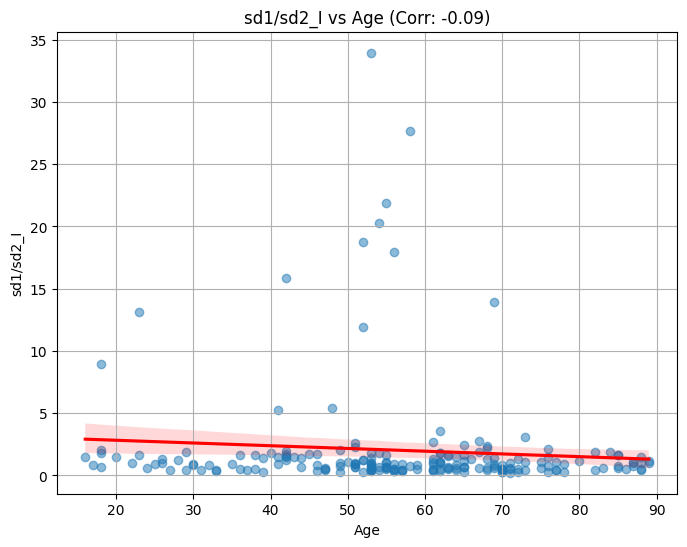

In [190]:
plot_features_vs_age(
    df=low_ptb_xl_features,
    age_column='age',
    save_dir= path_to_zip / 'ptb_xl_features_scatter_plots_v2',
    exclude_columns={'patient_id', 'target', 'original_length', 'file_name', 'age', 'sex'}
)